## 第一章~第二章：机器学习简介及线性回归 基础作业


目标：
- 了解机器学习的基本概念是； 
- 机器学习任务类型和工作流程； 
- 理解回归、L2损失函数、L1损失函数、Huber损失函数、梯度下降、L2正则、L1正则等基本概念； 
- 掌握特征工程的常用处理方法； 运用线性回归模型解决实际问题；

基础作业：
1. 对连续型特征，可以用哪个函数可视化其分布？（给出你最常用的一个即可），并根据代码运行结果给出示例。（10分） 
2. 对两个连续型特征，可以用哪个函数得到这两个特征之间的相关性？根据代码运行结果，给出示例。（10分） 
3. 如果发现特征之间有较强的相关性，在选择线性回归模型时应该采取什么措施。（10分） 
4. 当采用带正则的模型以及采用随机梯度下降优化算法时，需要对输入（连续型）特征进行去量纲预处理。课程代码给出了用标准化（StandardScaler）的结果，请改成最小最大缩放（MinMaxScaler）去量纲 （10分），并重新训练最小二乘线性回归、岭回归、和Lasso模型（30分）。 
5. 代码中给出了岭回归（RidgeCV）和Lasso（LassoCV）超参数（alpha_）调优的过程，请结合两个最佳模型以及最小二乘线性回归模型的结果，给出什么场合应该用岭回归，什么场合用Lasso，什么场合用最小二乘。（30分） 


In [26]:
# -*- coding:utf-8 -*-
import pandas as pd  #
import seaborn as sns
import matplotlib.pyplot as plt 

dapath = '../dataset/'  # 数据文件路径

cb = pd.read_csv(dapath + 'day.csv')  # 以csv格式读取数据



# print "cb　data type is %s" % cb.dtypes  # 输出各字段数据类型

# print cb.head()  # 打印文件头部内容，查看各字段前五列数据值
# print cb.tail()  # 打印数据尾部五个数据值


# 取出2011年数据作为训练数据
test_data = cb[cb['yr']==0]

# print test_data.describe() # 查看2011年最后五个数据，检测是否取出了2011年数据；

# 取出2012年数据作为测试数据
train_data = cb[cb['yr']==1]
# print train_data.describe()
# print cb.info()  # 查看数据基本信息，数据规模行列数，对应数据类型、是否有空值，存储量；



# sns.distplot(cb, bins=30, kde=False) # 数据中有str，不能直接使用，需要先处理；


# sns.countplot(cb)

# 使用seaborn　ditplot() 方法时，怎么转换数据中的非数值？
# TODO 怎么使用jupyter;
# TODO CB数据探索；

%matplotlib inline

In [27]:
#　查看是否有空值
test_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [28]:
print test_data.describe()  # 描述各字段属性统计

          instant      season     yr        mnth     holiday     weekday  \
count  365.000000  365.000000  365.0  365.000000  365.000000  365.000000   
mean   183.000000    2.498630    0.0    6.526027    0.027397    3.008219   
std    105.510663    1.110946    0.0    3.452584    0.163462    2.006155   
min      1.000000    1.000000    0.0    1.000000    0.000000    0.000000   
25%     92.000000    2.000000    0.0    4.000000    0.000000    1.000000   
50%    183.000000    3.000000    0.0    7.000000    0.000000    3.000000   
75%    274.000000    3.000000    0.0   10.000000    0.000000    5.000000   
max    365.000000    4.000000    0.0   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean     0.684932    1.421918    0.486665    0.466835    0.643665    0.191403   
std      0.465181    0.571831    0.189596    0.168836    0.148744    0.0

### 1. 连续型特征，可以用哪个函数可视化其分布？
A: 可以用seaborn displot()/hist()等方法；

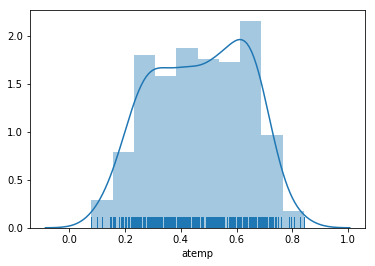

In [29]:
sns.distplot(test_data['atemp'], kde=True, rug=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d00e703d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8d00cecd50>]], dtype=object)

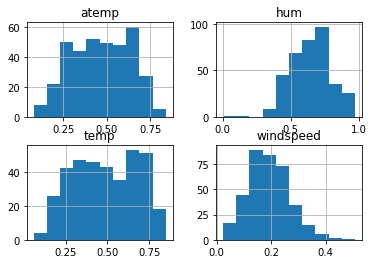

In [31]:
num_f = ['temp', 'atemp', 'hum', 'windspeed']
test_data[num_f].hist()

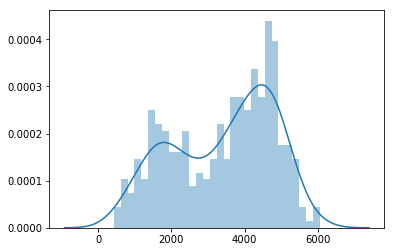

In [30]:
sns.distplot(test_data.cnt.values, bins=30, kde=True) # 画出总租车人数的直方图；


## 2.  对两个连续型特征，可以用哪个函数得到这两个特征之间的相关性？
A:分三种情况：
1. 两个数值特征之间相关性、先用plt.scatter()散点图看下，再用sns.heatmap()看具体相关性；
2. 数值特征与类型特征，可以用lmplot()函数中的hue参数指定感兴趣的类别特征，也可以用violinplot/boxplot表示在一个类型特征值下，另一个数值特征分布；
3. 类别特征与类别特征，通过设置hue参数，在图形中加入类别维度。除了使用图形类别分析之外，还可以使用统计学的传统工具：列联表（contingency table），又称交叉制表，使用表格表示多个类变量的频率分布；

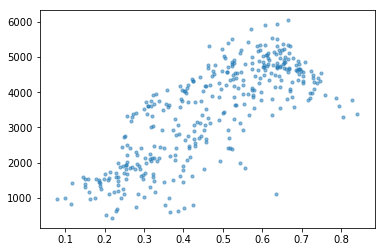

In [36]:
# 总租车人数和体感温度之间关系

plt.scatter(test_data['atemp'], test_data['cnt'], s=10, alpha=0.5)


In [17]:
#get names of all the columns
cols = test_data.columns

# calculate pearson co-efficient for all combinations
data_corr = test_data.corr().abs()

data_corr.shape

(15, 15)

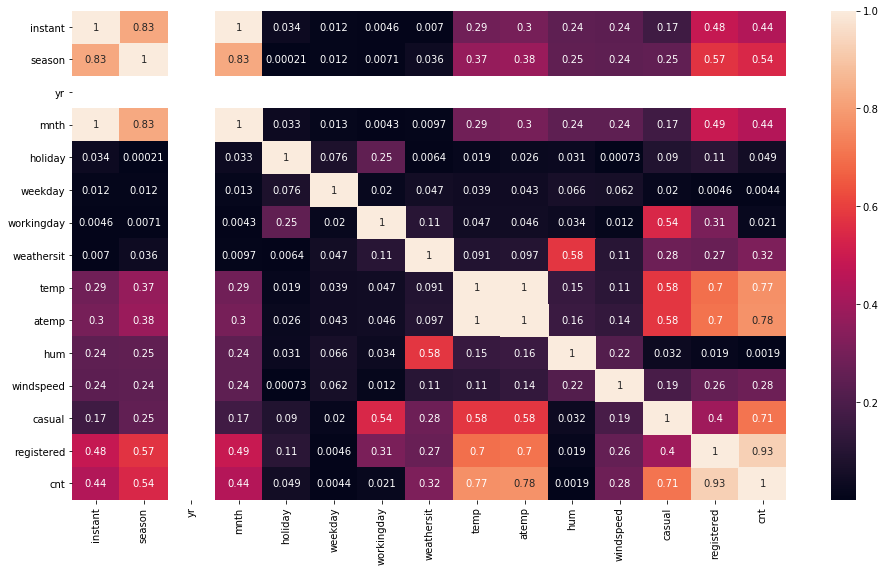

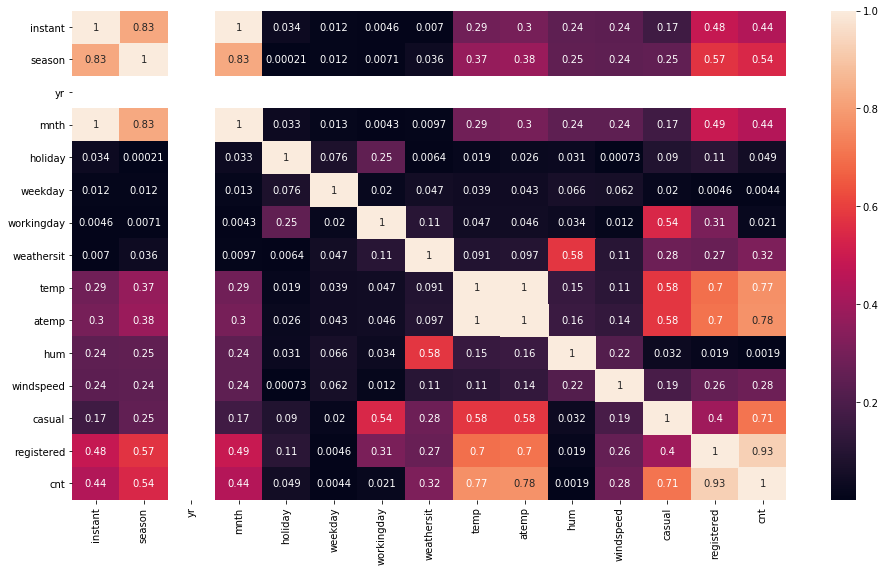

In [19]:
plt.subplots(figsize=(16,9))
sns.heatmap(data_corr, annot=True)

sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig('bike share_corr.png')
plt.show()


In [20]:
# set the threshold to select only highly correlated attributes
threshold = 0.5
# list of pairs along with correlation above threshold
corr_list = []
size = data_corr.shape[0]

# search for the highly correlated paris
for i in range(0, size):
    for j in range(i+1, size):
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1):
            corr_list.append([data_corr.iloc[i,j],i,j])
            
# sort to show higher ones first
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#print corelations and column names
for v,i,j in s_corr_list:
    print ('%s and %s = %.2f' % (cols[i],cols[j],v))

instant and yr = 1.00
weathersit and temp = 1.00
casual and registered = 0.93
dteday and yr = 0.83
instant and dteday = 0.83
temp and registered = 0.78
weathersit and registered = 0.77
windspeed and registered = 0.71
temp and casual = 0.70
weathersit and casual = 0.70
workingday and atemp = 0.58
temp and windspeed = 0.58
weathersit and windspeed = 0.58
dteday and casual = 0.57
dteday and registered = 0.54
weekday and windspeed = 0.54


### 3. 如果发现特征之间有较强的相关性，在选择线性回归模型时应该采取什么措施?
A：合并